In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
co2 = np.loadtxt(r'co2_mm_mlo.txt',  skiprows=472, dtype = float, usecols = 3)
co2_year = np.loadtxt(r'co2_mm_mlo.txt',  skiprows=472, dtype = float, usecols = 2)
co2 = co2[0:-1]
co2_year = co2_year[0:-1]
GMSL = np.loadtxt(r'GMSL_TPJAOS_5.1_199209_202208.txt', skiprows=49, usecols=5)
GMSL_x = np.loadtxt(r'GMSL_x.txt', dtype = str)
print(len(co2), len(co2_year),len(GMSL), len(GMSL_x))

355 355 1089 1089


In [3]:
month_current = GMSL_x[0]
count = 0
sum_temp = 0
GMSL_month = []
for i in range(len(GMSL)):
    if GMSL_x[i] == month_current:
        count += 1
        sum_temp += GMSL[i]
    else:
        GMSL_month.append(sum_temp/count)
        count = 1
        sum_temp = GMSL[i]
        month_current = GMSL_x[i]
GMSL_month.append(sum_temp/count)
print(len(GMSL_month))

355


In [4]:
def simple_linear_regression(raw_x, raw_y):
    n = np.size(raw_x)
    x = np.array(raw_x)
    y = np.array(raw_y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    num1 = np.sum(y*x) - n*y_mean*x_mean
    num2 = np.sum(x*x) - n*x_mean*x_mean
     
    r = num1 / num2
    b = y_mean - r * x_mean
    
    return (r, b)
r,b = simple_linear_regression(co2, GMSL_month)
print(r, b)

1.4556684554356414 -554.7408997152392


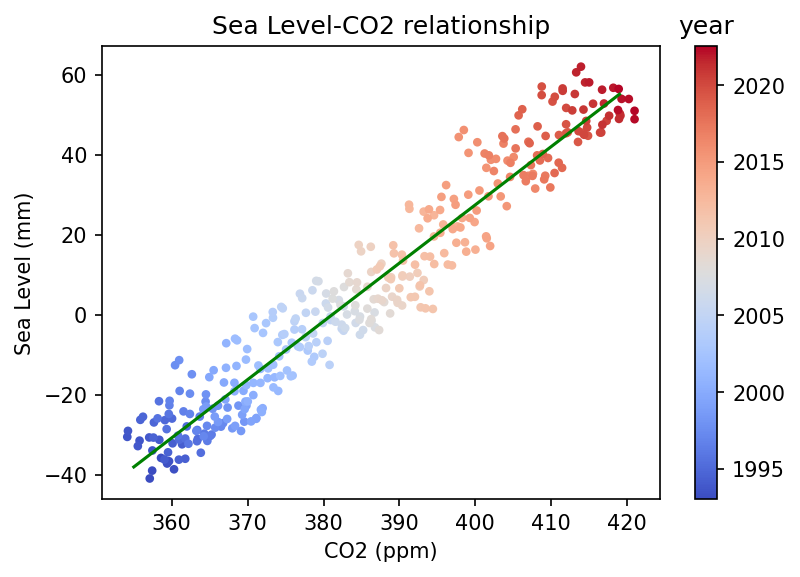

In [7]:
x = range(355,420)
y = x*r+b
plt.figure(dpi=150)
plt.title("Sea Level-CO2 relationship")
plt.xlabel("CO2 (ppm)")
plt.ylabel("Sea Level (mm)")
plt.plot(x,y,color="green")
plt.scatter(co2, GMSL_month, c=co2_year, s=10, cmap="coolwarm")
cb = plt.colorbar()
cb.ax.set_title("year")
plt.savefig("regression.jpg") 